##Case Study-Stout##
Alexopoulos Angelos



##Loading and Description##

We were given a data set that represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals. On this dataset is required to perform a number of tasks:



1.    Describe the dataset and any issues with it.

2.   Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing
3.   	Create a feature set and create a model which predicts interest_rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.
4.   	Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach.




In [1]:
#libraries import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#dataset loading and printing a sample of 10 rows
df = pd.read_csv('loans_full_schema.csv')
df.sample(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
8168,manager,10.0,IL,MORTGAGE,84000.0,Source Verified,26.89,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,DirectPay,35863.53,4806.58,4136.47,670.11,0.0
5686,sr business analyst,0.0,OH,RENT,82200.0,Not Verified,23.21,NaN,NaN,NaN,...,A4,Mar-2018,Current,fractional,Cash,14796.68,1476.54,1203.32,273.22,0.0
3364,teacher,10.0,TX,OWN,50000.0,Verified,13.66,NaN,NaN,NaN,...,B5,Feb-2018,Current,fractional,DirectPay,18114.51,2630.16,1885.49,744.67,0.0
6956,support engineer/web designer,10.0,RI,RENT,45000.0,Not Verified,17.71,NaN,NaN,NaN,...,B5,Mar-2018,Current,whole,Cash,17331.81,1176.70,668.19,508.51,0.0
7710,NaN,NaN,NJ,MORTGAGE,36000.0,Verified,3.80,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,9445.30,884.37,554.70,329.67,0.0
69,bartender,0.0,UT,RENT,25000.0,Source Verified,3.70,NaN,NaN,NaN,...,C1,Jan-2018,Current,fractional,Cash,4412.90,829.04,587.10,241.94,0.0
2711,corporate bookkeeper,10.0,NY,OWN,75000.0,Source Verified,2.94,NaN,NaN,NaN,...,B1,Mar-2018,Current,whole,Cash,15365.77,998.09,634.23,363.86,0.0
9255,instructor,10.0,MD,MORTGAGE,90000.0,Not Verified,13.42,NaN,NaN,NaN,...,D5,Jan-2018,Current,whole,Cash,19022.42,2671.17,977.58,1693.59,0.0
1227,solution architect,10.0,NY,MORTGAGE,130000.0,Not Verified,29.11,NaN,NaN,NaN,...,B2,Jan-2018,Current,fractional,Cash,10538.41,1927.48,1461.59,465.89,0.0
485,district manager,3.0,CA,RENT,120000.0,Not Verified,8.25,NaN,NaN,NaN,...,B1,Feb-2018,Current,whole,Cash,7218.41,1017.87,781.59,236.28,0.0


In [ ]:
#Dataset shape -
print("The size of the dataset is", df.shape )

The size of the dataset is (10000, 55)


Description
Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [ ]:


df.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False).T

,count,mean,std,min,25%,50%,75%,max
emp_length,9183.0,5.930306,3.703734,0.00,2.0000,6.000,10.0000,1.000000e+01
annual_income,10000.0,79222.148412,64734.290492,0.00,45000.0000,65000.000,95000.0000,2.300000e+06
debt_to_income,9976.0,19.308192,15.004851,0.00,11.0575,17.570,25.0025,4.690900e+02
annual_income_joint,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.000,151545.5000,1.100000e+06
debt_to_income_joint,1495.0,19.979304,8.054781,0.32,14.1600,19.720,25.5000,3.998000e+01
delinq_2y,10000.0,0.216000,0.683660,0.00,0.0000,0.000,0.0000,1.300000e+01
months_since_last_delinq,4342.0,36.760709,21.634939,1.00,19.0000,34.000,53.0000,1.180000e+02
earliest_credit_line,10000.0,2001.290000,7.795510,1963.00,1997.0000,2003.000,2006.0000,2.015000e+03
inquiries_last_12m,10000.0,1.958200,2.380130,0.00,0.0000,1.000,3.0000,2.900000e+01
total_credit_lines,10000.0,22.679600,11.885439,2.00,14.0000,21.000,29.0000,8.700000e+01


*  Check for null values




In [ ]:


df.columns[df.isnull().any()].tolist()
print("The columns that have null values are",len(df.columns[df.isnull().any()].tolist()), "and are", df.columns[df.isnull().any()].tolist())

The columns that have null values are 10 and are ['emp_title', 'emp_length', 'debt_to_income', 'annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due']


In [ ]:

df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [ ]:

print( "The total number of null values are", df.isnull().sum().sum()) 
freq=df.isnull().sum().sum()/(df.shape[0]*df.shape[1])
print(f"The total percentage of null values are {freq * 100:.2f} %. " )

The total number of null values are 42191
The total percentage of null values are 7.67 %. 


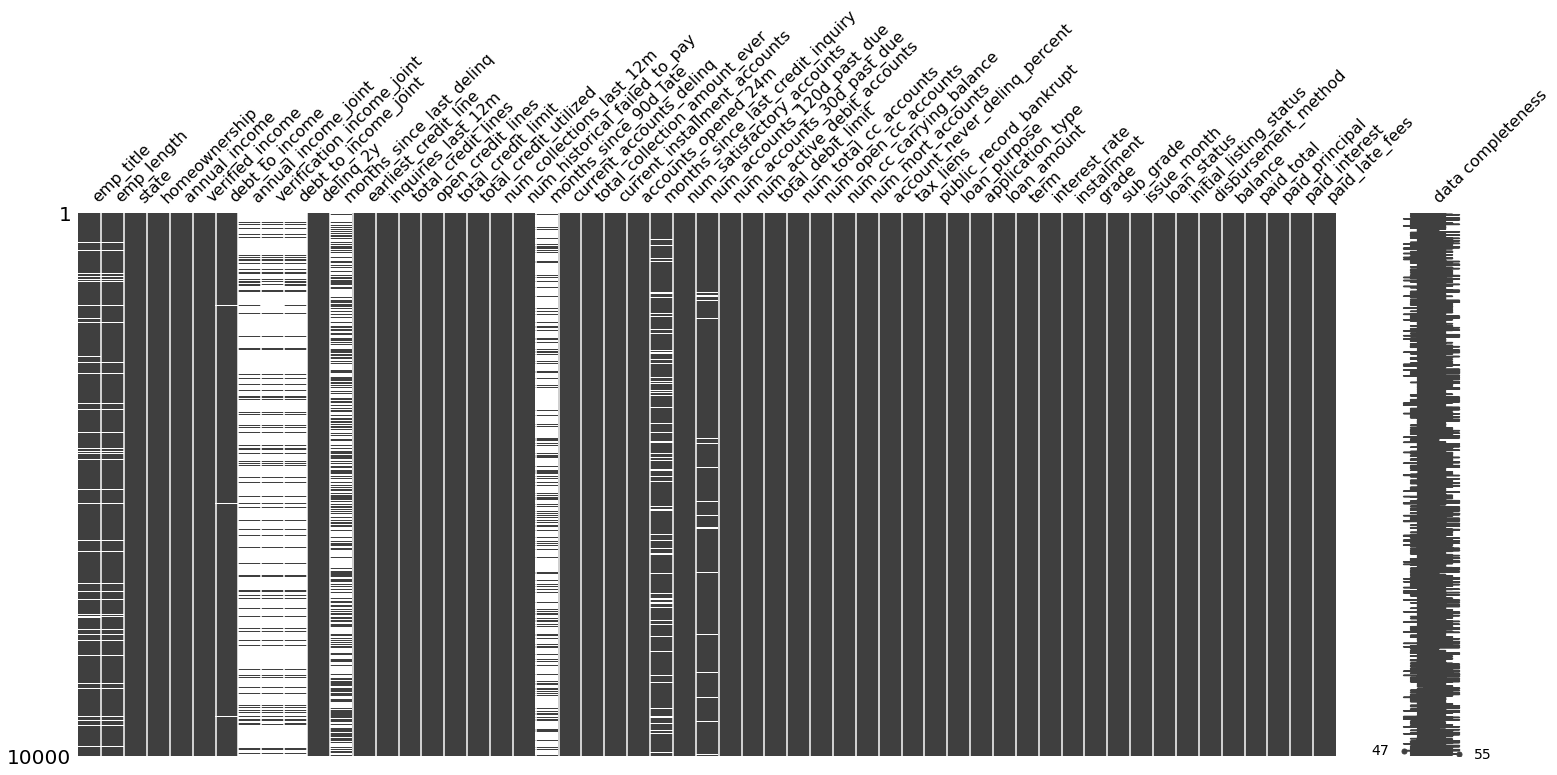

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df, labels = True,)

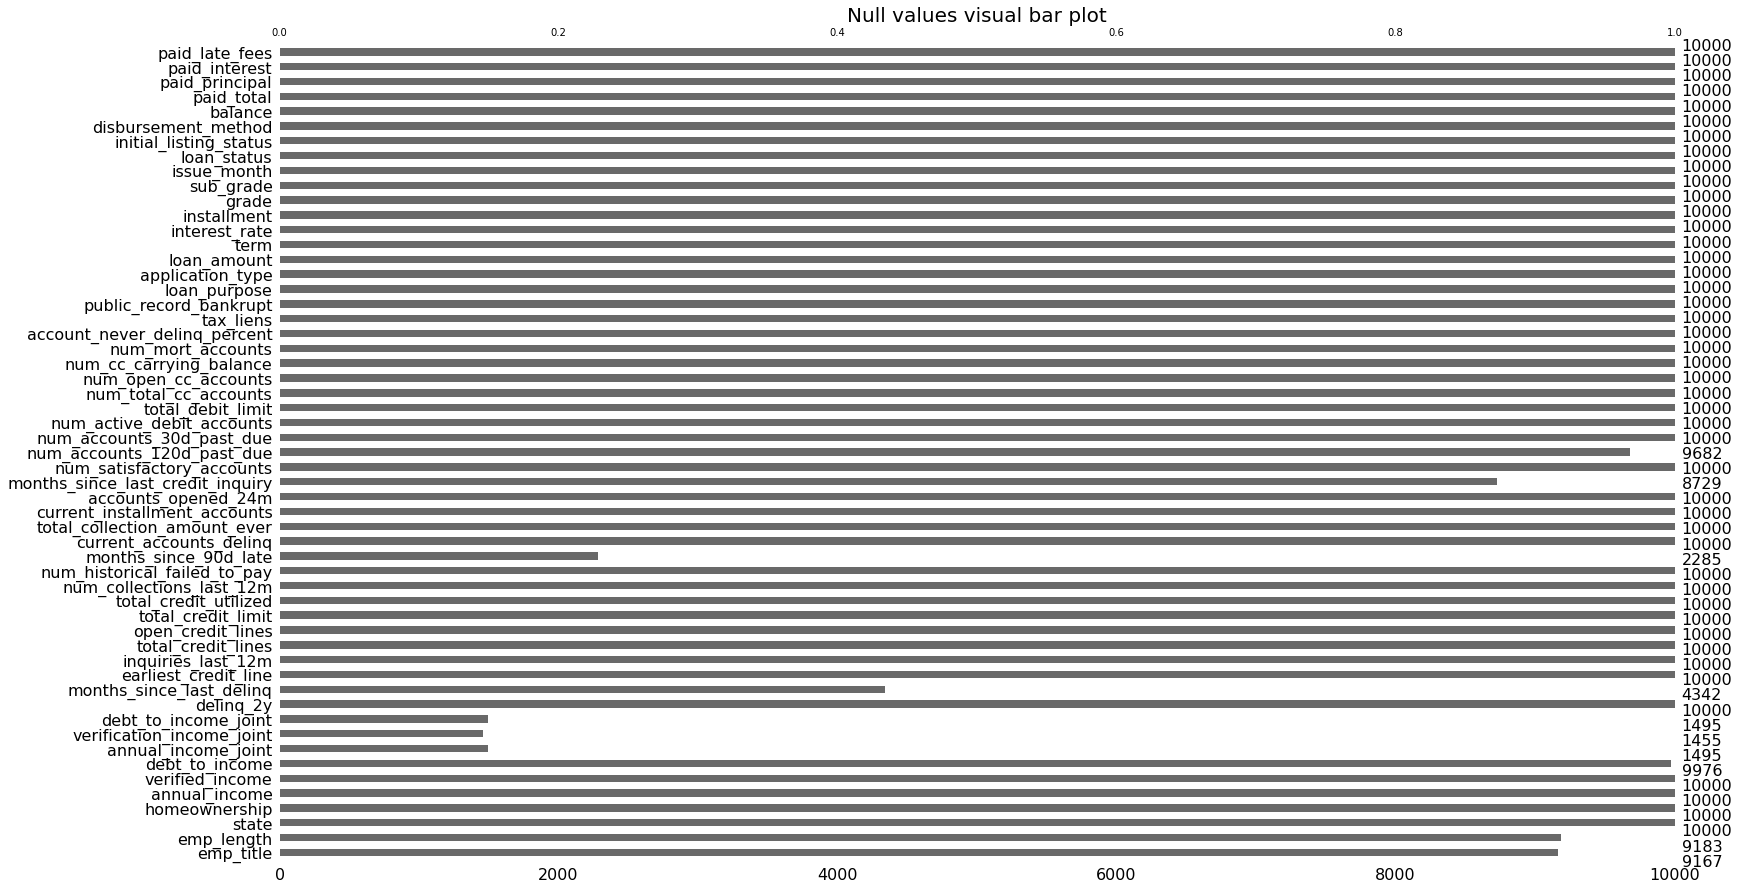

In [ ]:

plt.title('Null values visual bar plot',fontdict={'fontsize': 20})
msno.bar(df)


In [ ]:
#Dataframe that represents the percentage of columns with missing values
prc_missing_values = pd.DataFrame()
prc_missing_values['Percentage of missing values'] = ['over 10% ','over 20% ','over 30% ','over 40% ','over 50%','over 60%','over 70% ','over 80%', 'over 90%'] 


ten_percent    = len(df.columns[((df.isnull().sum())/len(df)) > 0.1])
twenty_percent = len(df.columns[((df.isnull().sum())/len(df)) > 0.2])
thirty_percent = len(df.columns[((df.isnull().sum())/len(df)) > 0.3])
forty_percent  = len(df.columns[((df.isnull().sum())/len(df)) > 0.4])
fifty_percent  = len(df.columns[((df.isnull().sum())/len(df)) > 0.5])
sixty_percent  = len(df.columns[((df.isnull().sum())/len(df)) > 0.6])
seventy_percent= len(df.columns[((df.isnull().sum())/len(df)) > 0.7])
eighty_percent = len(df.columns[((df.isnull().sum())/len(df)) > 0.8])
ninety_percent = len(df.columns[((df.isnull().sum())/len(df)) > 0.9])

prc_missing_values['Number of columns'] = [ten_percent, twenty_percent, thirty_percent, forty_percent, fifty_percent, sixty_percent, seventy_percent, eighty_percent, ninety_percent]

prc_missing_values




,Percentage of missing values,Number of columns
0,over 10%,6
1,over 20%,5
2,over 30%,5
3,over 40%,5
4,over 50%,5
5,over 60%,4
6,over 70%,4
7,over 80%,3
8,over 90%,0


In [ ]:
#Columns with high percentage of null values may cause trouble so we remove them based on a threshold of our desire
#threshold choice= 0.5
#new dataframe named af for dataset after columns drop
af=df.dropna(axis=1, thresh=int(0.5*len(df)))
af.shape

(10000, 50)

In [ ]:
#Null check again


af.columns[af.isnull().any()].tolist()
print("The number of columns that have null values is", len(af.columns[af.isnull().any()].tolist()),"and are", af.columns[af.isnull().any()].tolist())
print( "The total number of null values are", af.isnull().sum().sum()) 
freq=af.isnull().sum().sum()/(af.shape[0]*af.shape[1])
print(f"The total percentage of null values are {freq * 100:.2f} %. " )

The number of columns that have null values is 5 and are ['emp_title', 'emp_length', 'debt_to_income', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due']
The total number of null values are 3263
The total percentage of null values are 0.65 %. 


In [ ]:
af.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
delinq_2y                              0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit

We will get more info about the columns with missing value. The first on reffers to the jobs titles. A little guess is that the missing values refers to unemployed people. #The following 4 columns with missing values will be replaced using the interpolation method
af['emp_length'].

In [ ]:

af['emp_title'].value_counts()
print(af['emp_title'])

af['emp_title'] = af['emp_title'].fillna('Unemployed')

0       global config engineer 
1        warehouse office clerk
2                      assembly
3              customer service
4          security supervisor 
                 ...           
9995                     owner 
9996                   director
9997                  toolmaker
9998                    manager
9999         operations analyst
Name: emp_title, Length: 10000, dtype: object


<ipython-input-15-a24c3a5651a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af['emp_title'] = af['emp_title'].fillna('Unemployed')


In [ ]:

af['emp_length'] = af['emp_length'].interpolate(method='linear', limit_direction='forward', axis=0)
af['debt_to_income'] = af['debt_to_income'].interpolate(method='linear', limit_direction='forward', axis=0)
af['months_since_last_credit_inquiry'] = af['months_since_last_credit_inquiry'].interpolate(method='linear', limit_direction='forward', axis=0)
af['num_accounts_120d_past_due'] = af['num_accounts_120d_past_due'].interpolate(method='linear', limit_direction='forward', axis=0)


<ipython-input-16-096037186e2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af['emp_length'] = af['emp_length'].interpolate(method='linear', limit_direction='forward', axis=0)
<ipython-input-16-096037186e2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af['debt_to_income'] = af['debt_to_income'].interpolate(method='linear', limit_direction='forward', axis=0)
<ipython-input-16-096037186e2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

* Now there are no more missing values and we can continue with the visualizataion




In [ ]:

af.isnull().sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc

In [ ]:
af.info()
af.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         10000 non-null  object 
 1   emp_length                        10000 non-null  float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    10000 non-null  float64
 7   delinq_2y                         10000 non-null  int64  
 8   earliest_credit_line              10000 non-null  int64  
 9   inquiries_last_12m                10000 non-null  int64  
 10  total_credit_lines                10000 non-null  int64  
 11  open_credit_lines                 10000 non-null  int64  
 12  total

(10000, 50)

Generally as reffered in the documentation too the dataset represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals. After some pre-processing I ended up with 1000 rows and 50 columns. The main data prepocessing actions that I made was: 
*   Handling missing data
*   Handling categorical data (next chapter)


**Here is a description of the dataset:**
  The dataset contains information on loans made through the Lending Club platform. It includes variables such as the loan amount, interest rate, loan term, credit score, employment length, annual income, and more. The goal of this dataset is to predict the interest rate of a loan based on various borrower characteristics.

There are a few potential issues with the dataset:
1.	Missing values: Some of the variables have missing values, which may affect the accuracy of the model.
2.	Outliers: There may be outliers in the data that could impact the model's performance.
3.	Imbalanced classes: The classes (interest rates) may not be balanced, which could lead to a model that is biased towards the majority class.
4.	Correlated variables: Some of the variables may be correlated, which could affect the model's performance.
5.	Data leakage: There may be data leakage, where information that should not be available at the time of loan application is included in the dataset. This could lead to a model that is overly optimistic about its performance.




##Visualization##

In [ ]:
af.sample(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
432,instructor,10.0,TN,OWN,80000.0,Source Verified,33.37,0,1991,0,...,D4,Feb-2018,Current,whole,Cash,18756.83,2219.120000,1243.17,975.95,0.0
7778,senior manager-hub,10.0,CA,RENT,230000.0,Not Verified,12.37,0,1999,3,...,A4,Feb-2018,Current,whole,Cash,32379.50,4528.370000,3620.50,907.87,0.0
2928,waitress,10.0,CA,RENT,60000.0,Not Verified,35.58,0,1999,0,...,A4,Mar-2018,Current,whole,Cash,3236.76,324.430000,263.24,61.19,0.0
2219,teacher,10.0,CA,MORTGAGE,155555.0,Source Verified,20.15,0,2004,6,...,B3,Mar-2018,Current,whole,Cash,13920.33,1452.050000,1079.67,372.38,0.0
3239,coal miner,10.0,WV,MORTGAGE,75000.0,Not Verified,13.50,0,2007,4,...,C2,Feb-2018,Current,whole,Cash,9078.33,1351.610000,921.67,429.94,0.0
5892,sr web developer,2.0,CA,RENT,122000.0,Source Verified,2.20,1,1994,4,...,D1,Feb-2018,Fully Paid,whole,Cash,0.00,36863.037057,35000.00,1863.04,0.0
7787,script supervisor,10.0,CA,RENT,60000.0,Not Verified,11.52,0,2000,0,...,B1,Mar-2018,Current,whole,Cash,14832.04,1527.650000,1167.96,359.69,0.0
6653,fulfillment,3.0,CA,RENT,30000.0,Not Verified,14.58,1,2013,2,...,D2,Jan-2018,Current,fractional,Cash,1782.19,359.840000,217.81,142.03,0.0
1225,recruiter,10.0,PA,MORTGAGE,72000.0,Not Verified,24.86,0,2009,0,...,B2,Mar-2018,Current,fractional,Cash,38075.03,2633.490000,1924.97,708.52,0.0
5806,controller,10.0,CO,RENT,70000.0,Not Verified,19.65,0,1988,0,...,B1,Mar-2018,Current,whole,Cash,22248.07,2291.460000,1751.93,539.53,0.0


In [ ]:
(af['paid_total'].value_counts())
#af.columns

0.00       15
935.12     12
1519.57    12
1122.15    11
1274.96    10
           ..
1682.38     1
193.75      1
2205.02     1
178.44      1
1658.56     1
Name: paid_total, Length: 7475, dtype: int64

**First Vizualization**:Peaks of the data for Home Ownership.

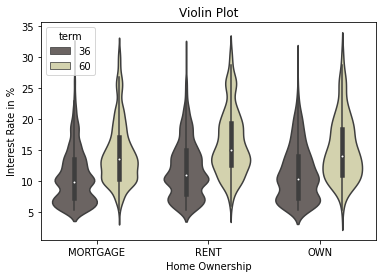

In [ ]:
sns.violinplot(x="homeownership", y="interest_rate", data=af, hue="term",palette=["#6c6361","#d9d8a8"])
plt.title("Violin Plot")
plt.xlabel("Home Ownership")
plt.ylabel("Interest Rate in %")
plt.grid(False)
plt.show()

**Second Vizualization:** Number of loans per loan grade.





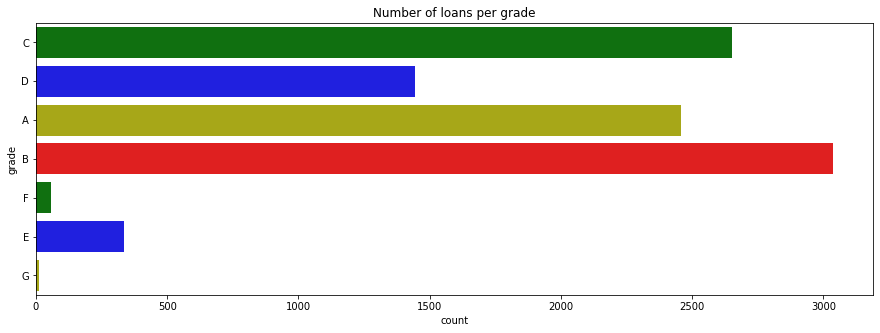

In [ ]:
redlines_labels = {'grade': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                   'desc':['A - Best', 'B - Still Desirable', 'C - Definitely Declining', 'D - Hazardous', 'Bad', 'Very Bad'],
                   'color': ['g', 'b', 'y', 'r', ]
         }
fig, ax  = plt.subplots(1,1,figsize=(15,5))
sns.countplot(y='grade',data=af, palette=redlines_labels['color'], ax=ax)
ax.set_title('Number of loans per grade');

**Third Vizualization:** Number of loans and per loan status.





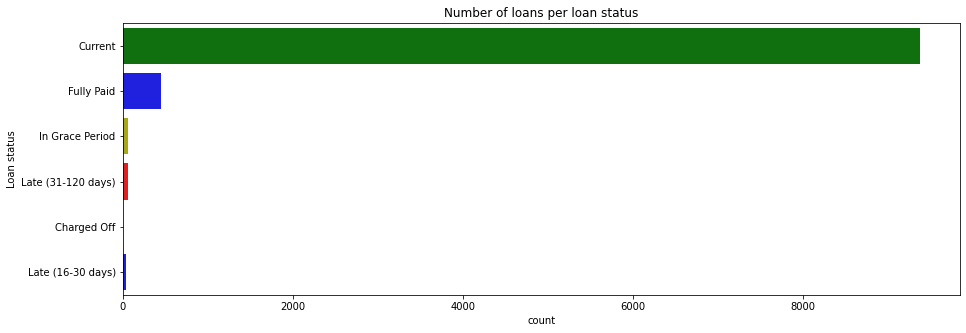

In [ ]:

fig, ax  = plt.subplots(1,1,figsize=(15,5))
sns.countplot(y='loan_status',data=af, palette=redlines_labels['color'], ax=ax)
plt.ylabel("Loan status")
ax.set_title('Number of loans per loan status');

**Fourth Vizualization:** Number of loans and per loan status andd per grade.

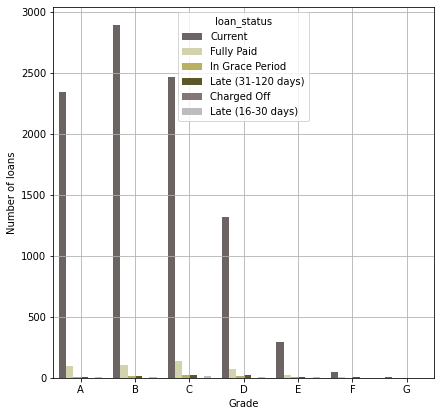

In [ ]:
plt.figure(figsize=(15, 15))
grade = sorted(af.grade.unique().tolist())
plt.subplot(2, 2, 1)
sns.countplot(x='grade', data=af, hue='loan_status', order=grade,palette=["#6c6361","#d9d8a8",'#c5be54',"#635e21","#847474","#bcbdbf"])
plt.ylabel("Number of loans")
plt.xlabel("Grade")
plt.grid(True)
plt.show()

**Fifth Visualization:**
How interest rate is distributed across its different values

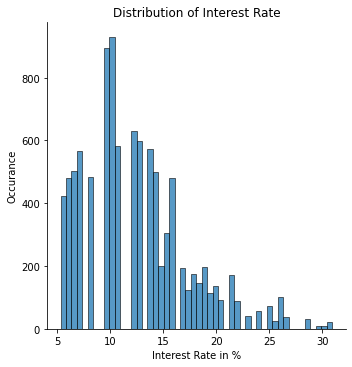

In [ ]:

sns.displot(af['interest_rate'])
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest Rate in %")
plt.ylabel("Occurance")
plt.grid(False)
plt.show()

**Sixth Visualization** 
Number of Loans per State.

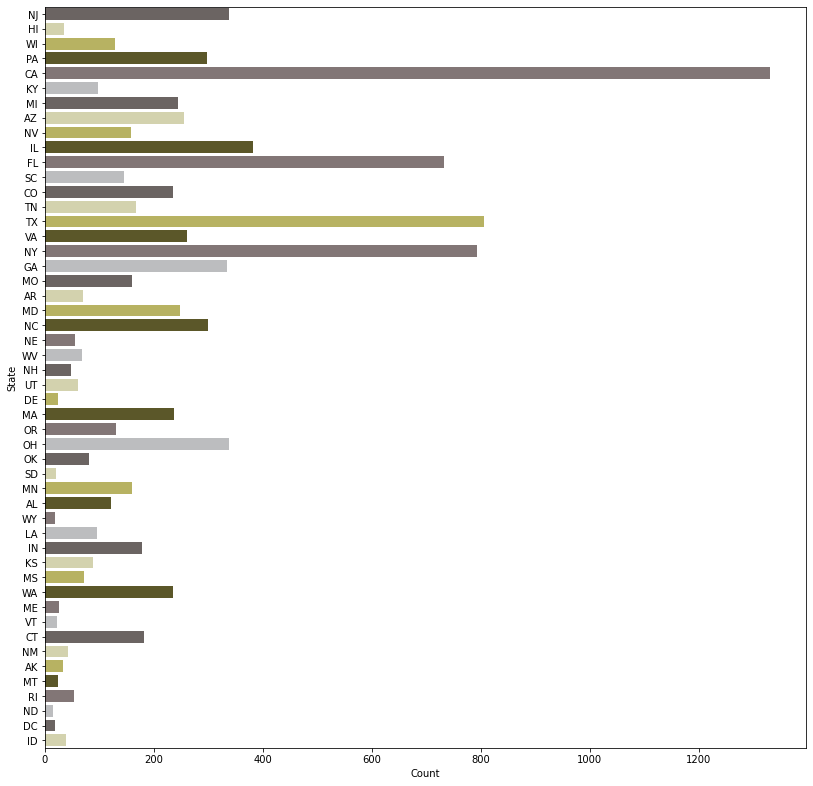

In [ ]:
#Loans per State
plt.figure(figsize=(30, 30))
loan_status = af.loan_status.unique().tolist()
plt.subplot(2, 2, 1)
sns.countplot(y='state', data=af,palette=["#6c6361","#d9d8a8",'#c5be54',"#635e21","#847474","#bcbdbf"])
plt.grid(False)
plt.ylabel("State")
plt.xlabel("Count")
plt.show()

**Seventh Visualization:**
 Correlation between variables

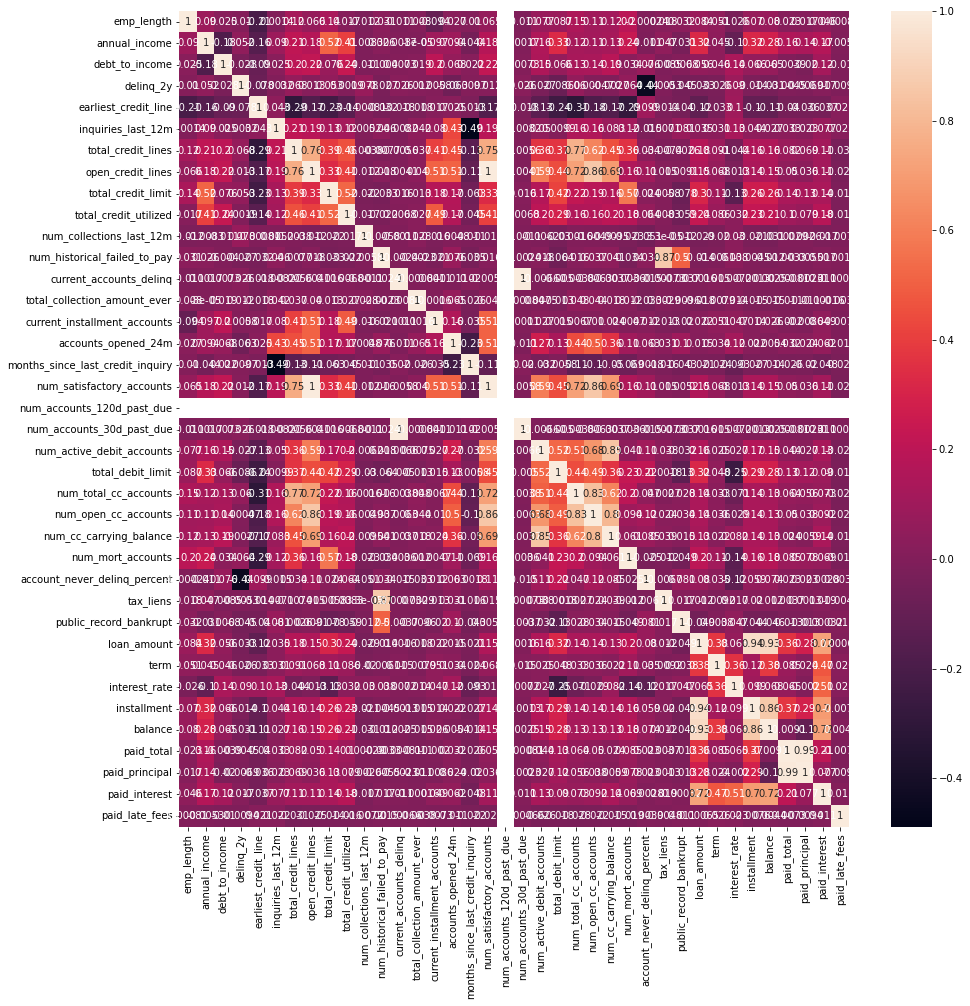

In [ ]:
#corr between variables
plt.figure(figsize = (15,15))
sns.heatmap(data = af.corr(), annot = True)
plt.show()

For this section the visualizations that I chose to recreate in order to get an insight for the data were:

*   A Violin Plot which shows the peaks of the data for Home Ownership(inputs:  homeownership per interest of rate).
*   Bar Chart whose inputs about number of loans and per grade
*   Bar Chart same as before about number of loans per status.
*   Bar Chart same as before about number of loans per status and grade.
*   Distribution Plot which shows how interest rate is distributed across its different values
*   Bar Chart which shows the distribution of loans per State.
*   Correlation Heatmap: check correlation between all the variables to get some info about them.


#**Model Creation**


  After the visualizations are over we will start making the data ready in order to be fed into the machine learning model. Initially, all the data must be in the same data type. So using LabelEncoding() the category 'emp_title' which have string value variables will be transformed to floats. LabelEncoding is used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

By default, it will assign integers to labels in the order that is observed in the data. If a specific order is desired, it can be specified via the “categories” argument as a list with the rank order of all expected labels.

* Encoder 

In [ ]:
#categorical to numerical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
labelencoder  = LabelEncoder()
oridnalencoder  = OrdinalEncoder()
for i in af.columns:
    if af[i].dtypes == 'object':
        
        af[i] = labelencoder.fit_transform(af[i])

<ipython-input-28-155d14521cd2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af[i] = labelencoder.fit_transform(af[i])


* Correlation

I will delete some attributes that are high correlated with the interest rate

In [ ]:
af.corr().abs()['interest_rate'].sort_values(ascending = False)

interest_rate                       1.000000
sub_grade                           0.992921
grade                               0.969402
paid_interest                       0.514508
term                                0.358664
total_debit_limit                   0.254225
verified_income                     0.242954
disbursement_method                 0.168792
debt_to_income                      0.141208
num_mort_accounts                   0.138351
inquiries_last_12m                  0.131193
total_credit_limit                  0.130497
account_never_delinq_percent        0.124702
accounts_opened_24m                 0.120657
loan_status                         0.109067
earliest_credit_line                0.103635
initial_listing_status              0.100040
annual_income                       0.099584
installment                         0.098811
months_since_last_credit_inquiry    0.092524
delinq_2y                           0.090456
num_cc_carrying_balance             0.081741
homeowners

In [ ]:

af = af.drop('grade', axis=1)
af = af.drop('term', axis=1)
af = af.drop('sub_grade', axis=1)

In [ ]:
#save the target variable in X->train and Y->test
#slpit the dataset to train and test
from sklearn.model_selection import train_test_split

X = af.drop(['interest_rate'],axis=1).values
y = af['interest_rate'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.01)

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score, accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model

Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. When a model has no error, the MSE equals zero. As model error increases, its value increases.

The mean absolute percentage error (MAPE) is the mean or average of the absolute percentage errors of forecasts. Error is defined as actual or observed value minus the forecasted value.

R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model.

###Random Forest

In [ ]:
# Fit the model on the training set
forest_out_of_the_box = RandomForestRegressor()
forest_out_of_the_box.fit(X_train, y_train)

# Predict on the test set
y_pred = forest_out_of_the_box.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for forest_out_of_the_box: {mse:.7f}')
mbe=mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for forest_out_of_the_box: {mbe:.7f}')
r2=r2_score(y_test, y_pred)
print(f'r2 for forest_out_of_the_box: {r2:.7f}')




Mean Squared Error for forest_out_of_the_box: 1.1172692
Mean Absolute Error for forest_out_of_the_box: 0.5733450
r2 for forest_out_of_the_box: 0.9472971


In [ ]:
#grid search to find the best parameters for RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
 
param_grid = [{'n_estimators':[50, 60, 70], 'max_depth':[10, 15 , 20], 'bootstrap':[True, False], 'max_features':[1, 2, 3]}]
forest = RandomForestRegressor()
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
final = grid_search.best_params_
print(final)

{'bootstrap': False, 'max_depth': 20, 'max_features': 3, 'n_estimators': 60}


In [ ]:
#run with optimus
forest = RandomForestRegressor(bootstrap= False, max_depth= 20, max_features= 3, n_estimators= 60)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for forest_out_of_the_box: {mse:.7f}')
mbe=mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for forest_out_of_the_box: {mbe:.7f}')
r2=r2_score(y_test, y_pred)
print(f'r2 for forest_out_of_the_box: {r2:.7f}')


Mean Squared Error for forest_out_of_the_box: 8.0238644
Mean Absolute Error for forest_out_of_the_box: 2.2761866
r2 for forest_out_of_the_box: 0.6215050


###K-Nearest Neighbors Algorithm for Regression


KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

In [ ]:
# Fit the model on the training set
knn_out_of_the_box = KNeighborsRegressor()
knn_out_of_the_box.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_out_of_the_box.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for knn_out_of_the_box: {mse:.7f}')
mbe=mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for knn_out_of_the_box: {mbe:.7f}')
r2=r2_score(y_test, y_pred)
print(f'r2 for knn_out_of_the_box: {r2:.7f}')


Mean Squared Error for knn_out_of_the_box: 21.1991537
Mean Absolute Error for knn_out_of_the_box: 3.6925200
r2 for knn_out_of_the_box: 0.0000113


In [ ]:
   
model = KNeighborsRegressor()
param_grid = {'n_neighbors':[45,50,55], 'weights':['uniform', 'distance']}
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", cv=5)
grid_search.fit(X_train, y_train)
final=grid_search.best_params_
print(final)

{'n_neighbors': 45, 'weights': 'distance'}


In [ ]:
#run with optimus

model = KNeighborsRegressor(n_neighbors= 45, weights= 'distance')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for knn after tuning: {mse:.7f}')
mbe=mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for knn after tuning: {mbe:.7f}')
r2=r2_score(y_test, y_pred)
print(f'r2 for knn after tuning: {r2:.7f}')


Mean Squared Error for knn after tuning: 17.9577164
Mean Absolute Error for knn after tuning: 3.5141383
r2 for knn after tuning: 0.1529137



So we conlcude that the optimum parameters for both r2_score and neg_mean_squared_error are {'n_neighbors': 45, 'weights': 'distance'}.


###Lasso Regression

Support Vector Machines (SVMs) are well known in classification problems. These types of models are known as Support Vector Regression (SVR).

In [ ]:
# Fit the model on the training set
lasso_out_of_the_box = linear_model.Lasso()
lasso_out_of_the_box.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_out_of_the_box.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for lasso_out_of_the_box: {mse:.7f}')
mbe=mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for lasso_out_of_the_box: {mbe:.7f}')
r2=r2_score(y_test, y_pred)
print(f'r2 for lasso_out_of_the_box: {r2:.7f}')


Mean Squared Error for lasso_out_of_the_box: 9.5420270
Mean Absolute Error for lasso_out_of_the_box: 2.3998805
r2 for lasso_out_of_the_box: 0.5498915


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.665e+04, tolerance: 2.478e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#grid search
lasso=linear_model.Lasso()
lasso_params = {'alpha':[ 0.005, 0.01 , 0.015 , 0.02 , 0.025]}
lass = GridSearchCV(lasso, lasso_params, cv=10 )
lass.fit(X_train, y_train)
final = lass.best_params_
print(final)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.602e+04, tolerance: 2.235e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.611e+04, tolerance: 2.242e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.548e+04, tolerance: 2.226e+01

{'alpha': 0.005}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.091e+04, tolerance: 2.478e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#run with optimus

model = linear_model.Lasso( 0.005, normalize=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Lasso after tuning: {mse:.7f}')
mbe=mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for Lasso after tuning: {mbe:.7f}')
r2=r2_score(y_test, y_pred)
print(f'r2 for Lasso after tuning: {r2:.7f}')


Mean Squared Error for Lasso after tuning: 12.0710217
Mean Absolute Error for Lasso after tuning: 2.7883716
r2 for Lasso after tuning: 0.4305959


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


###Results and Conclusion


  If I had more time, I would try to improve the model by adding more features, trying different algorithms, Outlier check: (box plot, z-score ... ) , pipelines and/or using more advanced techniques such as hyperparameter tuning or ensembling.

  We observe that in most cases the GridSearch fails to produce better results and the default version of a model is better. There are many reasons for that. Either we failed to explore all the parameters that could help achieve a better result or we did not choose our metrics quite well. Also, it is really important to note that initianally we removed the attributes with the highest correlation in order to get a most realistic result, thus we deprived the models from the best variables.

  Bellow there are the results for the baseline model and with green/red colours the scores with the hyper parameters included. Also the are the plots of the baseline metrics (mse,mbe,r2_score).

  I made the assumption that the dataset is representative of the population of loans made through the Lending Club platform, and that the features in the dataset are relevant for predicting interest rate. My approach was to first identify any issues with the dataset and perform necessary data cleansing, then split the data into a training set and a test set and fit the model using the training set. Finally, I evaluated the model on the test set and made observations about its performance.




|  |  |   Random Forest   | kNN  | Lasso | 
| :-: | :-: | :-: | :-: | :-: | 
| **MSE** || 1.1172692 <br> <font color='red'>8.0238644</font> | 21.1991537<br> <font color='green'>17.9577164</font> | 9.5420270 <br> <font color='red'> 12.0710217 </font> | 66.79 <br> <font color='green'>+88.36</font> | 69.01 <br> <font color='green'>pending</font> |
|**MBE** |  | <br>  0.5733450<br><font color='green'>2.2761866 | 3.6925200 <br> <font color='red'> 3.5141383 </font> | 2.3998805 <br> <font color='green'>2.7883716</font> | 67.86 <br> <font color='green'>+66.94%<
**R2_score** | | 0.9472971 <br> <font color='red'> 0.6215050 </font> | 0.0000113<br> <font color='green'> 0.1529137 </font> | 0.5498915 <br> <font color='red'>0.4305959


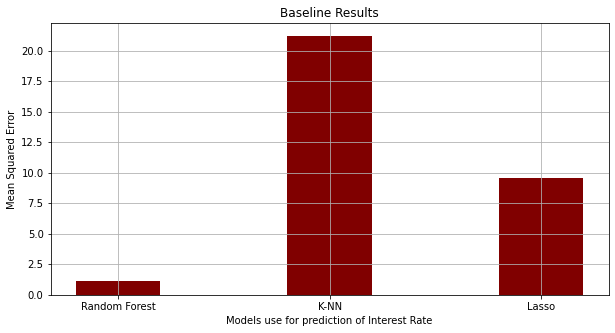

In [3]:
from typing import MutableSet

data = {'Random Forest':1.1172692, 'K-NN':21.1991537
, 'Lasso':9.5420270}
Models = list(data.keys())
MSE = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, MSE, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models use for prediction of Interest Rate")
plt.ylabel("Mean Squared Error")
plt.title("Baseline Results")
plt.grid(True)
plt.show()

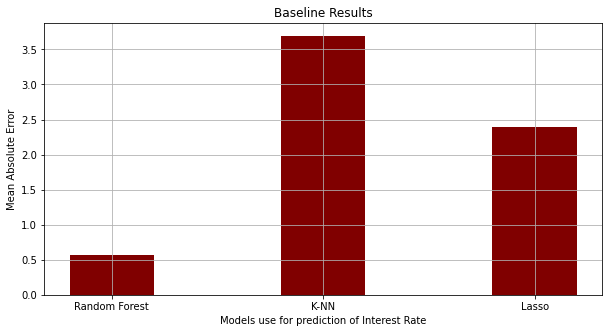

In [2]:

data = {'Random Forest':0.5733450, 'K-NN':3.6925200
, 'Lasso': 2.3998805}
Models = list(data.keys())
MSE = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, MSE, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models use for prediction of Interest Rate")
plt.ylabel("Mean Absolute Error")
plt.title("Baseline Results")
plt.grid(True)
plt.show()

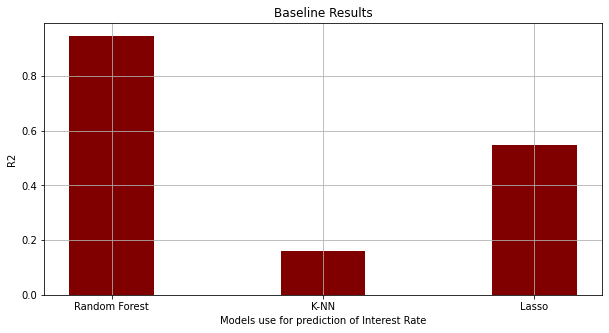

In [4]:
data = {'Random Forest': 0.9472971, 'K-NN':0.1602618
, 'Lasso': 0.5498915}
Models = list(data.keys())
MSE = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, MSE, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models use for prediction of Interest Rate")
plt.ylabel("R2")
plt.title("Baseline Results")
plt.grid(True)
plt.show()
